<a href="https://colab.research.google.com/github/marcon21/anlp-labs/blob/main/01_ANLP_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by copying this into your Google Drive!!

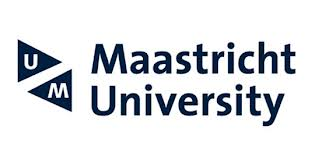
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing (ANLP) - Tutorial Tokenization

By Jan Scholtes
Version 2024-2025.1



---



Welcome to the tutorial on Tokenization. In this notebook you will learn how to preprocess text into tokens.

This is the basis of any Information Retrieval, Text Mining or NLP process. Tokenization is closely related to sentence detection, stemming, lemmatization and is part of the large NLP research topic named morphology.

Tokenization is highly language dependent. In this tutorial we focus on Western-European languages.

In this notebook, we will use the Stanford NLTK library.



Text extraction and cleanup is an important component of real-world NLP systems. Text extraction allows one to extract text from various electronic file formats (TXT, HTML, XML, PDF, DOCX, XLSX, PPTX, ...) and deals with the encoding of the characters (Unicode, UTF-8, Code pages or ACSII).

Libraries such as BeautifulSoup, Scapy or Selenium can assist you with webscraping and parsing text from HTML and XML.

You can run the example hereunder to see how a Webpage is scraped and parsed into tags, which can subsequently be questioned (remove the # before this line:"pprint(soupified.prettify())" to see the entire HTML file (it is long).

In [4]:
# making the necessary imports,
from pprint import pprint
from bs4 import BeautifulSoup
import requests
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
html = requests.get(myurl, headers={'user-agent': 'Scraper'}).text # query the website
soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format"

#pprint(soupified.prettify())      # for printing the full HTML structure of the webpage

question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())
answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

Question: 
 How do I get the current time in Python?
Best answer: 
 Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.


PDF can be quite challenging, especially from a formatting point of view. There are also many PDF reverse engineered formats that do not follow the official PDF guideliness completely. For popular formats from Microsoft, Google, Open Office and other vendors, there are several open source libraries to exract text and meta data. For more obscure file types, one has to fall back to commercial solutions such as Oracle Outside In, but these can be expensive.

Encoding normalization is important to map various variants of code pages (https://en.wikipedia.org/wiki/Code_page ), ASCII and other encodings to one common Unicode format (https://home.unicode.org/). UTF-8 is the most used one.

In this tutorial, we presume all this has been done and we can start with UTF-8 text files that only contain basic line (CR-LF) and tab formatting.

#NLTK

First we load NLTK

In [5]:
import nltk
nltk.download('punkt') # load tokenization

[nltk_data] Downloading package punkt to /Users/marcon21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLTK also contains many text corpora. Let's import the movie reviews.

In [6]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
movie_reviews.readme()

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/marcon21/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


'Sentiment Polarity Dataset Version 2.0\nBo Pang and Lillian Lee\n\nhttp://www.cs.cornell.edu/people/pabo/movie-review-data/\n\nDistributed with NLTK with permission from the authors.\n\n=======\n\nIntroduction\n\nThis README v2.0 (June, 2004) for the v2.0 polarity dataset comes from\nthe URL http://www.cs.cornell.edu/people/pabo/movie-review-data .\n\n=======\n\nWhat\'s New -- June, 2004\n\nThis dataset represents an enhancement of the review corpus v1.0\ndescribed in README v1.1: it contains more reviews, and labels were\ncreated with an improved rating-extraction system.\n\n=======\n\nCitation Info \n\nThis data was first used in Bo Pang and Lillian Lee,\n``A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization \nBased on Minimum Cuts\'\',  Proceedings of the ACL, 2004.\n\n@InProceedings{Pang+Lee:04a,\n  author =       {Bo Pang and Lillian Lee},\n  title =        {A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts

Let's see what is in there

In [7]:
raw = movie_reviews.raw()
print(raw[0:1000:1]) # print first 1000 chars


plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

Let's see if we can detect the long tail that is typical for natural language. First we seperate the text in indivudual words, then we run a frequency analsyis on the results.

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
<FreqDist with 39768 samples and 1583820 outcomes>
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595), (')', 11781), ('(', 11664), ('as', 11378), ('with', 10792), ('for', 9961), ('his', 9587), ('this', 9578), ('film', 9517), ('i', 8889), ('he', 8864), ('but', 8634), ('on', 7385), ('are', 6949), ('t', 6410), ('by', 6261), ('be', 6174), ('one', 5852), ('movie', 5771), ('an', 5744), ('who', 5692), ('not', 5577), ('you', 5316), ('from', 4999), ('at', 4986), ('was', 4940), ('have', 4901), ('they', 4825), ('has', 4719), ('her', 4522), ('all', 4373), ('?', 3771), ('there', 3770), ('like', 3690), ('so', 3683), ('out', 3637)]


<Axes: xlabel='Samples', ylabel='Counts'>

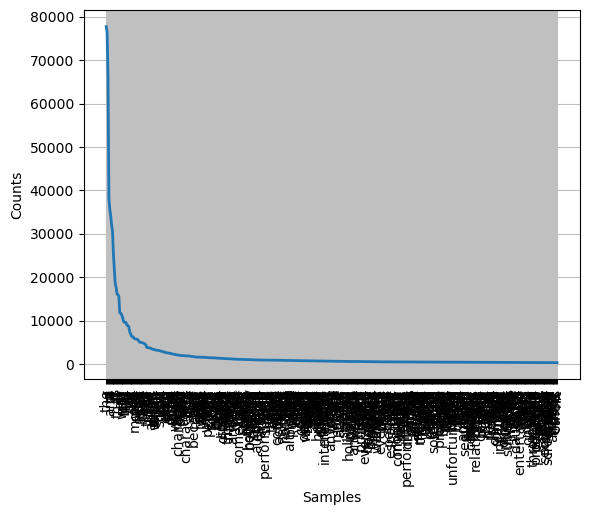

In [8]:
corpus = movie_reviews.words()
print(corpus)
freq_dist = nltk.FreqDist(corpus)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(500)

# Exercise 1:
a. What kind of a relation do you observe? A lineair, polynomial or power relation?  

b. What are the most frequent words?

c. Do these words have a clear meaning or can they have multiple meaning depending on the context?

d. Can these words also be used for (long) distance (complex) references?

e. What does this mean for your NLP algorithm?

ANSWER HERE:

1.a Power relation

1.b Words like "The", "a", "and". If we also include punctuation we also see "," and "." are very frequent.

1c. They have no meaning on their own, since they are always used to connect other words.

1d. No

1e. This words are not really worth analyzing too deeply, it would be better to focus on words that have a meaning on their own.



As you can also observe, punctuation characters such as .  and , and other ones (: ; " " ? ! ) are still in there. This is where tokenization comes in. Tokenization removes punctuations where they are used as sentence and phrase seperation, but leaves them where they are part of a token (e.g. an email address or abbreviation).  

#Sentence Detection

Sentences are the basic components of human language. For all of the applications we discuss in this course (e.g. Machine Translation, Abstracting, ...) the algorithms used to process language presume that the data consists of correct linguistic sentences. When machine learning is applied, this is also done using correct linguistic sentences. Therefor, sentence detection is extremely important in NLP. If language does not have the form of linguistic sentences, then many of the algorithms we teach in this course will not work. This is the case when dealing with tables, graphs or certain types of headers and footers (e.g. an address in the top of a letter).

Next, we load the NLTK tokenizer for sentences (sent_tokenize) and for words (word_tokenize)

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [10]:
my_text = "The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - \n is Maastricht University’s largest and oldest department \n broadly covering the fields of artificial intelligence, data science, computer science, \n mathematics and robotics. We maintain a large network of public and \n private partners through our research collaborations and through the \n award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s \n students in 3 specialized study programmes in Data Science \n and Artificial Intelligence. The Department of Advanced Computing Sciences \n  is the new joint identity of the Institute of Data Science (IDS) and the former \n Department of Data Science and Knowledge Engineering (DKE)."
print(my_text)


The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics. We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s 
 students in 3 specialized study programmes in Data Science 
 and Artificial Intelligence. The Department of Advanced Computing Sciences 
  is the new joint identity of the Institute of Data Science (IDS) and the former 
 Department of Data Science and Knowledge Engineering (DKE).


# Word Detection aka Tokenization

In [11]:
my_sentences = sent_tokenize(my_text)
# print(my_sentences) # print entire list unformatted
print("\n")
for x in range(len(my_sentences)):
    print(my_sentences[x]+"\n")



The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.

We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.

In addition, our staff teaches approximately 800 bachelor’s and master’s 
 students in 3 specialized study programmes in Data Science 
 and Artificial Intelligence.

The Department of Advanced Computing Sciences 
  is the new joint identity of the Institute of Data Science (IDS) and the former 
 Department of Data Science and Knowledge Engineering (DKE).



Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. A type is the class of all tokens containing the same character sequence.

In [12]:
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = word_tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))


Sentence: The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    -
    sometimes
    abbreviated
    as
    DACS
    -
    is
    Maastricht
    University
    ’
    s
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    ,
    data
    science
    ,
    computer
    science
    ,
    mathematics
    and
    robotics
    .
Sentence: We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.
Tokens: 
    We
    maintain
    a
    large
    network
    of
    public
    and
    private
    partners
    through
    our
    research
    collabor

As you can observe, there are still punctuation in the list of tokens. In NLTK these can be removed by using a regular expression.

In [13]:
from nltk.tokenize import RegexpTokenizer
new_tokenizer = RegexpTokenizer(r'\w+')
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = new_tokenizer.tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

Sentence: The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    sometimes
    abbreviated
    as
    DACS
    is
    Maastricht
    University
    s
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    data
    science
    computer
    science
    mathematics
    and
    robotics
Sentence: We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.
Tokens: 
    We
    maintain
    a
    large
    network
    of
    public
    and
    private
    partners
    through
    our
    research
    collaborations
    and
    through
    the
    awa

#Exercise 2:
As you can observe, our tokenizer cannot deal with tokens such as "Bachelor's" or "Master's". This has to do with the fact that the NLTK tokenizer does not recognize 's as 'its'. It is not part of the tokenizer's code to deal with that. When dealing with chemical formulas, RNA/DNA, part numbers, phone numbers (with spaces, -, . etc) we see similar problems. When there are problems with the tokenization, the errors propagate in subsequent parts of the processing.

We can address this problem by applying preprocessing and normalization of such tokens.

Write some code to preprocess 's into its and then do proper tokenization.

In [16]:
new_tokenizer = RegexpTokenizer(r"\w+")
for sentence in my_sentences:
    print("Sentence: " + str(sentence))
    
    tmp_sentence = sentence.replace("’s", " its")

    my_words = new_tokenizer.tokenize(tmp_sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
        print("    " + str(my_words[x]))

Sentence: The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    sometimes
    abbreviated
    as
    DACS
    is
    Maastricht
    University
    its
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    data
    science
    computer
    science
    mathematics
    and
    robotics
Sentence: We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.
Tokens: 
    We
    maintain
    a
    large
    network
    of
    public
    and
    private
    partners
    through
    our
    research
    collaborations
    and
    through
    the
    a

# Generate a Vocabulary

A vocabulary is a data structure containing every unique word used in the corpus only once and in alphabetical order. This can be used as a dictionairy in NLP or as the basis of a search index in information retrieval.

In [17]:
corpus_tokens = new_tokenizer.tokenize(my_text.lower()) #use the tokenizer that removes punctuation
vocab = sorted(set(corpus_tokens))
print(vocab)
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

['3', '800', 'a', 'abbreviated', 'addition', 'advanced', 'and', 'approximately', 'artificial', 'as', 'award', 'bachelor', 'broadly', 'collaborations', 'computer', 'computing', 'covering', 'dacs', 'data', 'department', 'dke', 'engineering', 'fields', 'former', 'identity', 'ids', 'in', 'institute', 'intelligence', 'is', 'joint', 'ke', 'knowledge', 'large', 'largest', 'maastricht', 'maintain', 'master', 'mathematics', 'network', 'new', 'of', 'oldest', 'our', 'partners', 'private', 'programme', 'programmes', 'public', 'research', 'robotics', 's', 'science', 'sciences', 'sometimes', 'specialized', 'staff', 'students', 'study', 'teaches', 'the', 'through', 'university', 'we', 'winning', 'work']
Tokens: 107
Vocabulary: 66


#Stop Words

In the past, when computer resources were still limited, highly frequent words were often removed in information retrieval applications. These are named stop-words or noise-words. These are words such as "the, on, in, a, be, or, and, an, for, to, ...". If such a word is removed, one can no longer search for them. Imagine searching for "to be or not to be", which is no longer after noise word removal.

In text-mining and advanced NLP (especially when using context-sensitive deep-leaning models), these words often contain important clues on the meaning of language. Removing them will completely destroy the performance of the models.

So, these days as computer resources are much larger and context sensitive models need these words for disambiguation, noise words are no longer removed.

But let's try how to remove them using NLTK.

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print("Stopwords from NLTK:", stopwords.words('english'))
stop_words_nltk = set(stopwords.words('english'))
# we use the token list without punctuations
print("Tokenized corpus:",corpus_tokens)
#now remove stopwords
tokenized_corpus_without_stopwords = [i for i in corpus_tokens if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

Stopwords from NLTK: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcon21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Exercise 3:

3.a What do you observe with respect to case sensitivity of proper names and words such as "I".
It is case sensitive and "I" is not removed.

3.b How can we solve that?
By converting all words to lowercase before removing the stopwords.

3.c Could this actions also lead to unwanted side effects?
I and other stopwords when written partially or completly in uppercase may contain important information that we dont want to remove.



#Stemming

Stemming is the process of removing suffixes and reducing the word to some base form such that all different variations of a word can be represented by one form. Stemming uses rules and may not always result in the correct linguistic base form. However, it is fast and therefor often used by search engines. As we discussed in the lecture, a well-known stemmer for the English language is the Porter stemmer.

Let's try it ...

In [24]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
print("before stemming -> after stemming")
for word in corpus_tokens:
  print(str(word) + " -> " + str(stemmer.stem(word)))


before stemming -> after stemming
the -> the
department -> depart
of -> of
advanced -> advanc
computing -> comput
sciences -> scienc
sometimes -> sometim
abbreviated -> abbrevi
as -> as
dacs -> dac
is -> is
maastricht -> maastricht
university -> univers
s -> s
largest -> largest
and -> and
oldest -> oldest
department -> depart
broadly -> broadli
covering -> cover
the -> the
fields -> field
of -> of
artificial -> artifici
intelligence -> intellig
data -> data
science -> scienc
computer -> comput
science -> scienc
mathematics -> mathemat
and -> and
robotics -> robot
we -> we
maintain -> maintain
a -> a
large -> larg
network -> network
of -> of
public -> public
and -> and
private -> privat
partners -> partner
through -> through
our -> our
research -> research
collaborations -> collabor
and -> and
through -> through
the -> the
award -> award
winning -> win
ke -> ke
work -> work
programme -> programm
in -> in
addition -> addit
our -> our
staff -> staff
teaches -> teach
approximately -> appr

As you can see, "students" is converted into "student", but "Science" is converted into "scien". There are other non-linguistically correct transformations.

#Lemmatization

This why we prefer to use lemmatization for linguistic applications other than search engines. Lemmatization is the process of mapping all tokens to its base-linguistic form: the "lemma". So "better" should be converted to "good" and "is" to "be".

In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # downloading wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print("before lemmatization -> after lemmarization")
for word in corpus_tokens:
  print(str(word) + " -> " + str(lemmatizer.lemmatize(word)))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcon21/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marcon21/nltk_data...


before lemmatization -> after lemmarization
the -> the
department -> department
of -> of
advanced -> advanced
computing -> computing
sciences -> science
sometimes -> sometimes
abbreviated -> abbreviated
as -> a
dacs -> dacs
is -> is
maastricht -> maastricht
university -> university
s -> s
largest -> largest
and -> and
oldest -> oldest
department -> department
broadly -> broadly
covering -> covering
the -> the
fields -> field
of -> of
artificial -> artificial
intelligence -> intelligence
data -> data
science -> science
computer -> computer
science -> science
mathematics -> mathematics
and -> and
robotics -> robotics
we -> we
maintain -> maintain
a -> a
large -> large
network -> network
of -> of
public -> public
and -> and
private -> private
partners -> partner
through -> through
our -> our
research -> research
collaborations -> collaboration
and -> and
through -> through
the -> the
award -> award
winning -> winning
ke -> ke
work -> work
programme -> programme
in -> in
addition -> additi

As you can observe, only plurals and other basic operations are performed. But "is" not converted to "be". Neither are several verb inflections. This is because Lemmatization requires more linguistic knowledge: it need to know whether we are dealing with, for instance, a verb, noun or a adjectice. We call these gramatical roles "part-of-speech" or POS tags. These will be discussed in the next lecture: Syntax and Semantics.

In [26]:
print(lemmatizer.lemmatize('better'))
print(lemmatizer.lemmatize('better',pos='a')) # a for Adjective
print(lemmatizer.lemmatize('is'))
print(lemmatizer.lemmatize('is',pos='v'))  # v for Verb
print(lemmatizer.lemmatize('is',pos='a'))
print(lemmatizer.lemmatize('is',pos='n'))  # n for Noun
print(lemmatizer.lemmatize('richer',pos='n'))
print(lemmatizer.lemmatize('richer',pos='a'))




better
good
is
be
is
is
richer
rich


# Text-Normalization

In social media, one can run in short-cuts, slang, hash-tags, or emoticons. These can be concerted to their textual forms. Phone numbers, dates and monetary amounts can be written in many different forms. Sometimes, one can even decide to convert all text to either lower case or upper case. This may cause problems in some applications and should be used carefully. We will discuss this in more detail in the course Text Mining, where this is more important.

#Language Detection

Almost all NLP models and algorithms are very language specific: this means that one can only use them with the intenred language. Using them on other language will result in random behavior.  

So, language detection (often per sentence or minimally per paragrpah) is essential for any type of NLP application to perform correctly!

In [27]:
!pip install langdetect
from langdetect import detect, detect_langs
def language_detection(text, method = "single"):
  if(method.lower() != "single"):
    result = detect_langs(text)
  else:
    result = detect(text)
  return result

multilingual_text = "Elle est vraiment éfficace dans la détection de langue."
print(language_detection(multilingual_text))
multilingual_text = "Het is enorm makkelijk om een taal te herkennen!"
print(language_detection(multilingual_text))
multilingual_text = "Es ist wirklich effektiv bei der Spracherkennung."
print(language_detection(multilingual_text))
multilingual_text = "Nó thực sự hiệu quả trong việc phát hiện ngôn ngữ."
print(language_detection(multilingual_text))
multilingual_text = "إنه فعال حقًا في اكتشاف اللغة."
print(language_detection(multilingual_text))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=ecf7df246ab848a4a35873ba4b15dbf9f6ed3ed8fc9e5a7faf32aed71ed08d61
  Stored in directory: /Users/marcon21/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
fr
nl
de
vi
ar


# Transliteration

Transliteration refers to the method of mapping from one system of writing to another based on phonetic similarity. With this tool, you type in Latin letters (e.g. a, b, c etc.), which are converted to characters that have similar pronunciation in the target language. For transliteration, you need to select the target language. So, results for a transliteration of a Arabic name into English, French or German can be very different for similar names.

Лев Николаевич Толстой

results in different forms of transliteration for different target languages:

Lev Nikolayevich Tolstoy

Léon Tolstoï

Lev Tolstoj

León Tolstó

Lev Tolstoy

Lav Tolstoj

Lev Tolsto

Liuni Tolstoi

Ļevs Tolstojs

Levs Tuolstuos

...




A Python library for transliteration can be found here: https://pypi.org/project/transliterate/. We will discuss this in more detail in the lecture on Machine Translation.

#Exercise 4: Final reflections on tokenization.

As we have seen in this tutorial, tokenization is a very important component of NLP. Any error in this phase will propagate in the rest of the processing. Tokenization errors can occur from:
- wrong character set (character encodings not in tokenizer)
- wrong language
- wrong sentence detection or no sentences at whole
- un-expected tokens (chemical formula, RNA/DNA. part numbers, ...)
- wrongly dealing with abbreviations
- different spelling variations (212)-123.4567 vs 212 123 4567 for NYC phone numbers.
- text mutilation by using removal of stop words or stemming
- typos, spelling variations and errors

4.a How would you identify potential tokenization problems in your NLP project?

4.b In what order would you do the detection and pre-processing to deal with the above problems in your NLP project?

YOUR ANSWER HERE

4a. Try to read the output of the model to make sure the changes are being correctly applied. Also experience and knownledge can help you identify potential problems.

4b. In general i would deal with errors that are prune to propagate more easily through the processing, like character set, language and sentence detection. And then i would move to more specific problems that even though they are still important, they are less likely to affect the next steps of the pre-processing.

# Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.